# Task 1

In [ ]:

import pandas as pd

all_columns = ['age', 'workclass', 'education',
         'marital-status', 'occupation', 'relationship',
         'race', 'sex', 'capital-gain','capital-loss', 'hours-per-week',
         'native-country', "Target"]

#load data set with correct column names and no blank space
train_data = pd.read_csv('adult_train.txt', header = None, names = all_columns, skipinitialspace=True)



In [ ]:
train_data.head()


,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Target
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
train_data.shape


(32561, 13)

In [ ]:
train_data[train_data['native-country'] == '?']

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Target
14,40,Private,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
38,31,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,HS-grad,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
61,32,?,7th-8th,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
93,30,Private,HS-grad,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32449,44,Self-emp-inc,Masters,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
32469,58,Self-emp-inc,Doctorate,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
32492,42,Self-emp-not-inc,HS-grad,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
32510,39,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


In [ ]:
#Remove all rows that have question marks
for i in all_columns:
  train_data = train_data[train_data[i] != '?']



train_data.shape


(30162, 13)

In [ ]:
train_data["native-country"].value_counts()
train_data.dtypes

age                int64
workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Target            object
dtype: object

In [ ]:
#all the same steps used for training data for test data
test_data = pd.read_csv('adult_test.txt', header = None, names = all_columns, skipinitialspace=True)

for i in all_columns:
  test_data = test_data[test_data[i] != '?']


In [ ]:
test_data.shape

(15060, 13)

In [ ]:
test_data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Target
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


# Task 2

In [ ]:

from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(train_data)
categorical_columns.remove('Target')
categorical_columns
data_categorical = train_data[categorical_columns]

num_columns_selector = selector(dtype_exclude = object)
num_columns = num_columns_selector(train_data)
data_num =pd.DataFrame(train_data, columns=num_columns)

In [ ]:
pd.set_option('display.max_rows', None)
print(data_num.value_counts('age'))

age
36    852
31    851
33    837
34    836
37    828
35    828
23    824
30    813
28    808
25    799
38    791
27    789
32    789
39    786
29    774
41    769
40    765
24    752
26    745
43    743
42    741
46    711
45    706
44    704
47    683
22    674
20    629
21    621
19    594
50    575
51    571
49    555
48    523
52    455
53    448
18    447
54    394
55    386
58    344
56    343
57    337
59    332
17    328
60    276
61    259
62    213
63    186
64    173
65    136
67    111
66    110
68     90
69     80
70     64
71     54
73     49
72     40
74     38
90     35
75     34
76     29
77     20
80     16
79     15
78     14
81     13
84      8
82      7
83      5
85      3
88      3
86      1
dtype: int64


In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
data_encoded = encoder.fit_transform(data_categorical)

columns_encoded = encoder.get_feature_names_out(data_categorical.columns)
encoded_data = pd.DataFrame(data_encoded, columns=columns_encoded)


In [ ]:
data_encoded = encoder.fit_transform(train_data)

print(data_encoded[:10])


[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
column_name_to_remove = 'native-country_Holand-Netherlands'  # Replace with the correct column name

# Drop the specified column
encoded_data = encoded_data.drop(column_name_to_remove, axis=1)

print(encoded_data.shape)

encoded_data.head()

(30162, 97)


,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

model_dt = DecisionTreeClassifier()
target = train_data['Target']

X_train, X_valid, y_train, y_valid = train_test_split(
    encoded_data,
    target,
    test_size = 0.3,
    random_state = 35 #last two were 03 which isnt valid
)

In [ ]:
cv_result = cross_validate(model_dt, encoded_data, target, cv = 5 )
cv_result['test_score']

array([0.81236532, 0.81286259, 0.81780504, 0.81382626, 0.81266578])

# Task 3

In [ ]:
import matplotlib.pyplot as plt

train_accuracy_max_depth = []
validation_accuracy_max_depth = []

In [ ]:
#Test different max depths for the decision tree
for i in range(1, 31):
  dt_model = DecisionTreeClassifier(max_depth = i)
  dt_model.fit(X_train, y_train)
  train_accuracy_max_depth.append(dt_model.score(X_train, y_train))
  validation_accuracy_max_depth.append(dt_model.score(X_valid, y_valid))

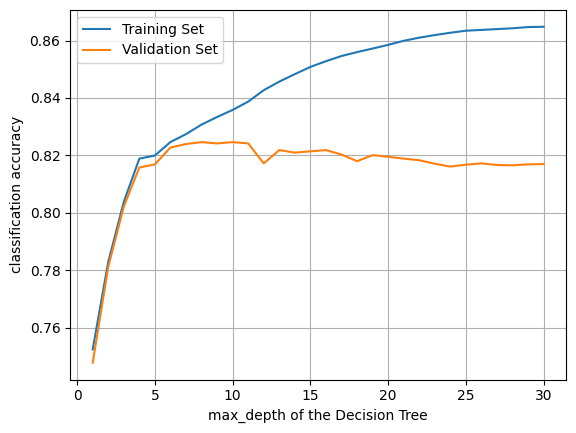

In [ ]:
#Plot the different values found for testing different max depths
max_depth = list(range(1, 31))
plt.plot(max_depth, train_accuracy_max_depth, label = "Training Set")
plt.plot(max_depth, validation_accuracy_max_depth, label = "Validation Set")
plt.xlabel("max_depth of the Decision Tree")
plt.ylabel("classification accuracy")
plt.grid()
plt.legend()

In [ ]:
train_accuracy_min_leaf = []
validation_accuracy_min_leaf = []

for i in range(1, 50):
  dt_model = DecisionTreeClassifier(min_samples_leaf = i)
  dt_model.fit(X_train, y_train)
  train_accuracy_min_leaf.append(dt_model.score(X_train, y_train))
  validation_accuracy_min_leaf.append(dt_model.score(X_valid, y_valid))

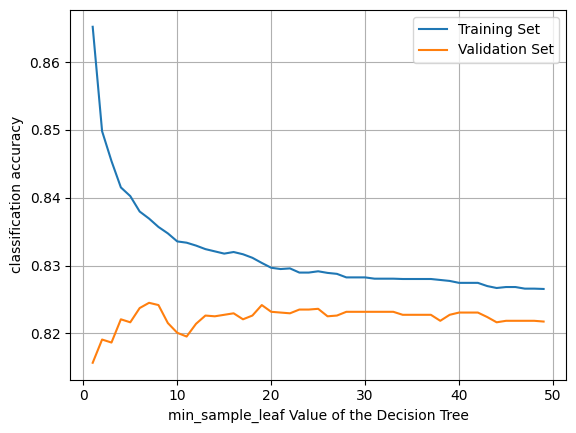

In [ ]:
min_leaf = list(range(1, 50))
plt.plot(min_leaf, train_accuracy_min_leaf, label = "Training Set")
plt.plot(min_leaf, validation_accuracy_min_leaf, label = "Validation Set")
plt.xlabel("min_sample_leaf Value of the Decision Tree")
plt.ylabel("classification accuracy")
plt.grid()
plt.legend()

In [ ]:
import numpy as np

best_depth = np.argmax(validation_accuracy_max_depth)
best_leaf = np.argmax(validation_accuracy_min_leaf)

print(f"Best Depth: {best_depth}")
print(f"Best min leaf: {best_leaf}")

Best Depth: 7
Best min leaf: 6


# Task 4

In [ ]:
from sklearn.ensemble import RandomForestClassifier

train_accuracy_estimators = []
validation_accuracy_estimators = []

for i in range(1, 50):
  dt_model = RandomForestClassifier(n_estimators = i)
  dt_model.fit(X_train, y_train)
  train_accuracy_estimators.append(dt_model.score(X_train, y_train))
  validation_accuracy_estimators.append(dt_model.score(X_valid, y_valid))

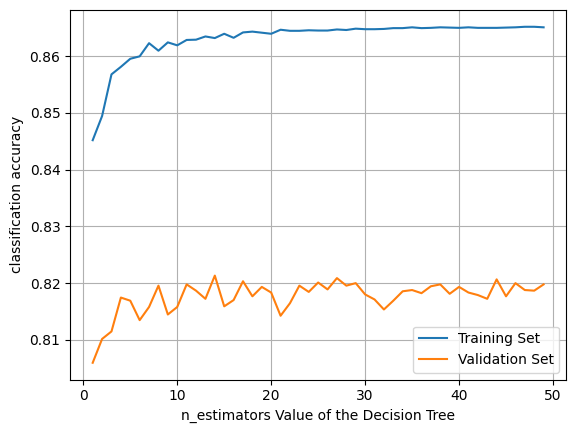

In [ ]:
estimators = list(range(1, 50))
plt.plot(estimators, train_accuracy_estimators, label = "Training Set")
plt.plot(estimators, validation_accuracy_estimators, label = "Validation Set")
plt.xlabel("n_estimators Value of the Decision Tree")
plt.ylabel("classification accuracy")
plt.grid()
plt.legend()

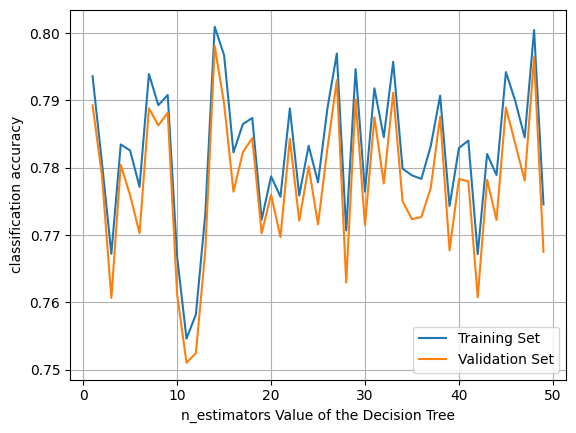

In [ ]:
#Repeat above steps with min_leaf and max_depth
train_accuracy_estimators = []
validation_accuracy_estimators = []

for i in range(1, 50):
  dt_model = RandomForestClassifier(n_estimators = i, max_leaf_nodes = best_leaf, max_depth=best_depth)
  dt_model.fit(X_train, y_train)
  train_accuracy_estimators.append(dt_model.score(X_train, y_train))
  validation_accuracy_estimators.append(dt_model.score(X_valid, y_valid))


estimators = list(range(1, 50))
plt.plot(estimators, train_accuracy_estimators, label = "Training Set")
plt.plot(estimators, validation_accuracy_estimators, label = "Validation Set")
plt.xlabel("n_estimators Value of the Decision Tree")
plt.ylabel("classification accuracy")
plt.grid()
plt.legend()

In [ ]:
best_estimators = np.argmax(validation_accuracy_estimators)

print(f"Best Depth: {best_estimators}")

Best Depth: 13


# Task 5

In [ ]:


#Get the test data ready
test_categorical = test_data[categorical_columns]
test_data_encoded = encoder.fit_transform(test_categorical)

test_columns_encoded = encoder.get_feature_names_out(test_categorical.columns)
test_encoded_data = pd.DataFrame(test_data_encoded, columns=test_columns_encoded)
missing_cols = set(encoded_data.columns) - set(test_encoded_data.columns)
print(missing_cols)
test_target = test_data['Target']
print(test_encoded_data.shape)
print(test_target.shape)
test_target.head()

set()
(15060, 97)
(15060,)


0    <=50K
1    <=50K
2     >50K
3     >50K
5    <=50K
Name: Target, dtype: object

In [ ]:
test_encoded_data.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
#fit the decision tree
model_dt = DecisionTreeClassifier(min_samples_leaf= best_leaf, max_depth=best_depth)
model_dt.fit(X_train, y_train)

model_rf = RandomForestClassifier(min_samples_leaf= best_leaf, max_depth=best_depth, n_estimators= best_estimators)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=6, n_estimators=13)

In [ ]:
pd.set_option('display.max_columns', None)

train_data.value_counts('native-country')

native-country
United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
El-Salvador                     100
India                           100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Haiti                            42
Iran                             42
Taiwan                           42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
France       

In [ ]:
#first add missing column to the data_set, just place zero for all of this cause no one in the test set is from holand_netherlands
test_accuracy = model_dt.score(test_encoded_data, test_target)
test_accuracy_rf = model_rf.score(test_encoded_data, test_target)

In [ ]:
#print accuracy of models
print(f"DecisionTreeClassifier: The accuracy using the test set is {test_accuracy}")
print(f"RandomForestClassifier: The accuracy using the test set is {test_accuracy_rf}")

DecisionTreeClassifier: The accuracy using the test set is 0.8221115537848606
RandomForestClassifier: The accuracy using the test set is 0.8187250996015937


In [ ]:
#Find the predicitons of each value from the data set to use to find the confusion matrix, percision, and recall
from sklearn.metrics import confusion_matrix

predictions = model_dt.predict(test_encoded_data)
predictions_rf = model_rf.predict(test_encoded_data)

In [ ]:
#print the confusion matrixs of the two models
print("DecisionTree Confusion Matrix:")
print(confusion_matrix(test_target, predictions))
print("Randomforest Confusion Matrix: ")
print(confusion_matrix(test_target, predictions_rf))

DecisionTree Confusion Matrix:
[[10489   871]
 [ 1808  1892]]
Randomforest Confusion Matrix: 
[[10653   707]
 [ 2023  1677]]


In [ ]:
#Find the percision and recall of both models and print them
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

perc = precision_score(test_target, predictions, average = "macro")
recall = recall_score(test_target, predictions, average = "macro")

perc_rf = precision_score(test_target, predictions_rf, average = "macro")
recall_rf = recall_score(test_target, predictions_rf, average = "macro")

print("\nDecisionTreeClassifier:")
print(f"The percision of the model is {perc}")
print(f"The recall score of the model is {recall}")

print("\nRandomForestClassifier:")
print(f"The percision of the model is {perc_rf}")
print(f"The recall score of the model is {recall_rf}")


DecisionTreeClassifier:
The percision of the model is 0.7688676042469333
The recall score of the model is 0.7173394080700419

RandomForestClassifier:
The percision of the model is 0.7719233328956481
The recall score of the model is 0.6955036638751427


# Task 6

This program was challenging to build and took up alot of time for me to get outputs that were acceptable. Ive never used the decision trees before so that was fun to learn about. The hardest part for me was that I kept getting an error due to the Holand-Netherlands entry in the train data and their being no such entry in the test data. The most fun part was getting to see the graphs change everytime I went through my program it really showed how dynamic the process really is and made the whole assignment much more intersting for me.